In [2]:
#import data manipulation libraries
import numpy as np
import pandas as pd

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#import logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s',
                    filename='model.log',
                    filemode='w')
#importing scikit learn libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


In [3]:
#importing dataset using pandas function
url='https://raw.githubusercontent.com/preet-pandey/Bank_Classification_Model/refs/heads/main/bank.csv'
df=pd.read_csv(url,sep=';')
df.sample(frac=1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1188,38,blue-collar,married,primary,no,2569,no,no,unknown,9,jun,172,1,-1,0,unknown,no
2130,31,blue-collar,single,primary,no,864,yes,no,telephone,14,may,113,2,-1,0,unknown,no
4078,30,management,married,tertiary,no,562,no,no,cellular,21,aug,137,4,-1,0,unknown,no
283,42,admin.,divorced,secondary,no,63,no,no,unknown,16,may,88,6,-1,0,unknown,no
848,41,blue-collar,married,secondary,no,4900,yes,no,telephone,31,jul,121,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no
862,41,admin.,single,secondary,no,1020,yes,no,unknown,19,may,882,1,-1,0,unknown,yes
4139,51,blue-collar,divorced,secondary,no,1069,yes,no,unknown,30,may,247,2,-1,0,unknown,no
2563,55,admin.,married,secondary,no,865,yes,no,cellular,17,apr,85,1,151,1,failure,no


In [4]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#step 1 : segregate columns categorical and numerical
categorical_columns = df.select_dtypes(include='object')
numerical_cols = df.select_dtypes(include=['int64','float64'])

In [6]:
#step 2 : Evaluate descriptive stats 
from collections import OrderedDict

stats = []
for i in numerical_cols.columns:
    numerical_stats = OrderedDict({
        'feature': i,
        'mean': numerical_cols[i].mean(),
        'median': df[i].median(),
        'mode': df[i].mode()[0],
        'min': df[i].min(),
        'max': df[i].max(),
        'std': df[i].std(),
        'var': df[i].var(),
        'skew': df[i].skew(),
        'kurtosis': df[i].kurtosis(),
        'range': df[i].max() - df[i].min(),
        'q1': df[i].quantile(0.25),
        'q3': df[i].quantile(0.75),
        'iqr': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)
import pandas as pd

report = pd.DataFrame(stats)
print(report)







    feature         mean  median  mode   min    max          std  \
0       age    41.170095    39.0    34    19     87    10.576211   
1   balance  1422.657819   444.0     0 -3313  71188  3009.638142   
2       day    15.915284    16.0    20     1     31     8.247667   
3  duration   263.961292   185.0   123     4   3025   259.856633   
4  campaign     2.793630     2.0     1     1     50     3.109807   
5     pdays    39.766645    -1.0    -1    -1    871   100.121124   
6  previous     0.542579     0.0     0     0     25     1.693562   

            var      skew   kurtosis  range     q1      q3     iqr  
0  1.118562e+02  0.699501   0.348775     68   33.0    49.0    16.0  
1  9.057922e+06  6.596431  88.390332  74501   69.0  1480.0  1411.0  
2  6.802402e+01  0.094627  -1.039531     30    9.0    21.0    12.0  
3  6.752547e+04  2.772420  12.530050   3021  104.0   329.0   225.0  
4  9.670897e+00  4.743914  37.168920     49    1.0     3.0     2.0  
5  1.002424e+04  2.717071   7.957128    8

In [7]:
#classification always msolve loggistic and loggistic based on sigmoid function
#varaince =  spread of the data
# if IQR is (0) thendrop the column
'''
whenever evaluate the descriptive statistics iQR cannot be zero
such column cannot be perform machine learning

'''

'\nwhenever evaluate the descriptive statistics iQR cannot be zero\nsuch column cannot be perform machine learning\n\n'

In [8]:
# data insights:
'''
1. the averge call duration recorded 264 seconds.this can be one of the cause
   for the people who have not subcribe the bank term deposite.

2. if the call duration more than 300 seconds the chance are there person will 
   subcribe the bank term deposite.

3.the target audiance is divorced people....  

4. the people who have taken a loan are excluded  from the bank term deposite subsription.


   
 pie chart insights

 :88.48% people are not subcribe bank term deposite.

'''

'\n1. the averge call duration recorded 264 seconds.this can be one of the cause\n   for the people who have not subcribe the bank term deposite.\n\n2. if the call duration more than 300 seconds the chance are there person will \n   subcribe the bank term deposite.\n\n3.the target audiance is divorced people....  \n\n4. the people who have taken a loan are excluded  from the bank term deposite subsription.\n\n\n   \n pie chart insights\n\n :88.48% people are not subcribe bank term deposite.\n\n'

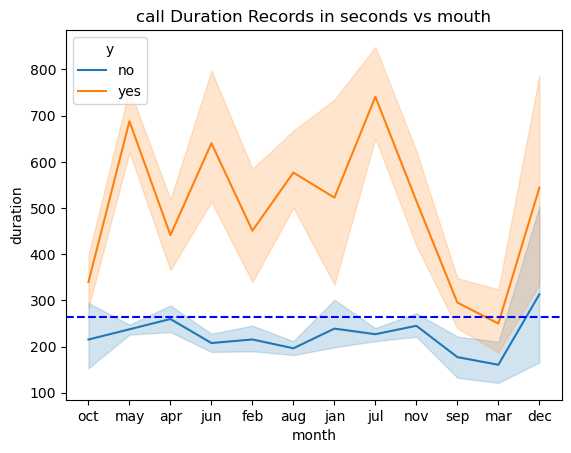

In [9]:
sns.lineplot(x=df['month'],y=df['duration'],hue = df['y'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('call Duration Records in seconds vs mouth')
plt.show()


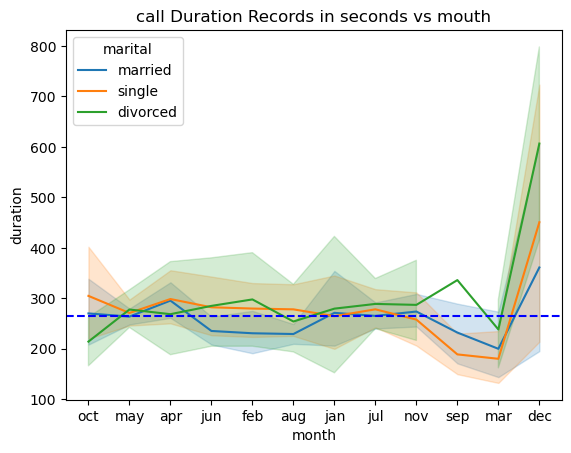

In [10]:
sns.lineplot(x=df['month'],y=df['duration'],hue = df['marital'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('call Duration Records in seconds vs mouth')
plt.show()


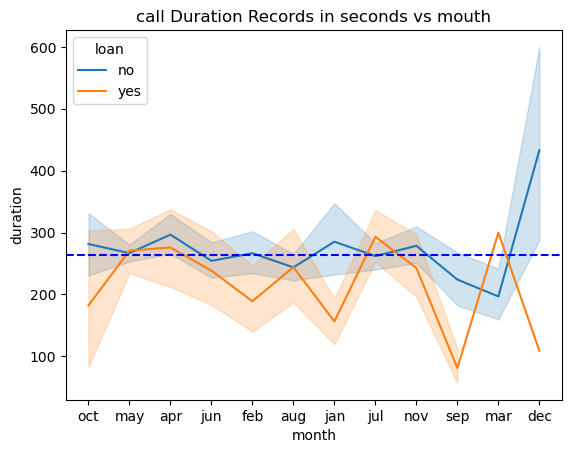

In [11]:
sns.lineplot(x=df['month'],y=df['duration'],hue = df['loan'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('call Duration Records in seconds vs mouth')
plt.show()

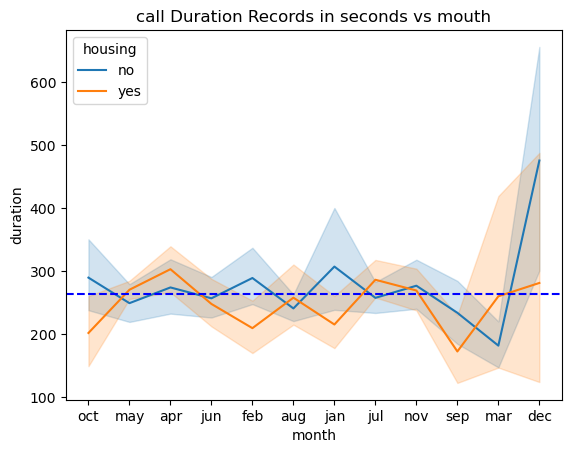

In [12]:
sns.lineplot(x=df['month'],y=df['duration'],hue = df['housing'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('call Duration Records in seconds vs mouth')
plt.show()

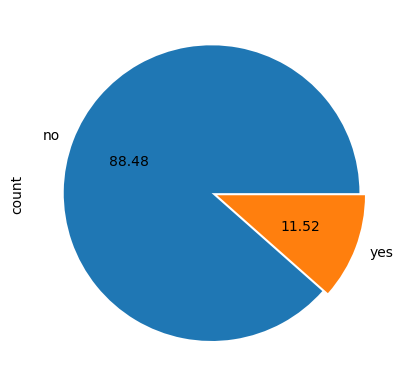

In [13]:
#problem Definition 
'''
the dataset consist of 4521 and 71 columns. this dataset  belongs to portugal bank where our aim is to classify whether  the customer
 will subscribe the bank term deposite or not .

 type of machine learning model: binary classfication 

 above dataset is a type of multivariate analysis.

 X = Indepent columns 
 y = Target column / Dependent column

 Here, y acts as target column / Dependent Column.
 '''
#checking distribution of people who subscribe the term depsoite
'''
based on distribution of target column, we found that the data is imbalance.
'''

df['y'].value_counts().plot(kind = 'pie', autopct = '%1.2f',
                            explode = [0.02,0.02])
plt.show()

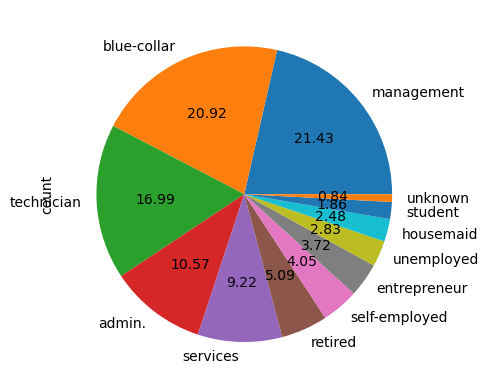

In [14]:
df['job'].value_counts().plot(kind = 'pie', autopct = '%1.2f')
plt.show()


In [15]:
management=df[df['job']=='management']
bluecollar = df[df['job']=='blue-collar']

<Axes: ylabel='count'>

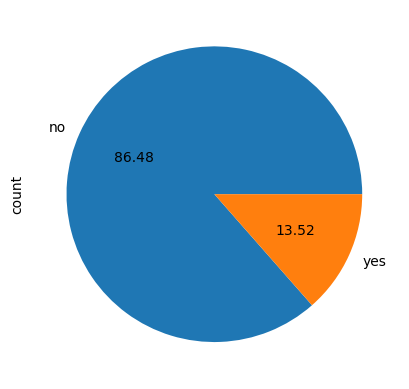

In [16]:
management['y'].value_counts().plot(kind = 'pie',autopct='%1.2f')

<Axes: ylabel='balance'>

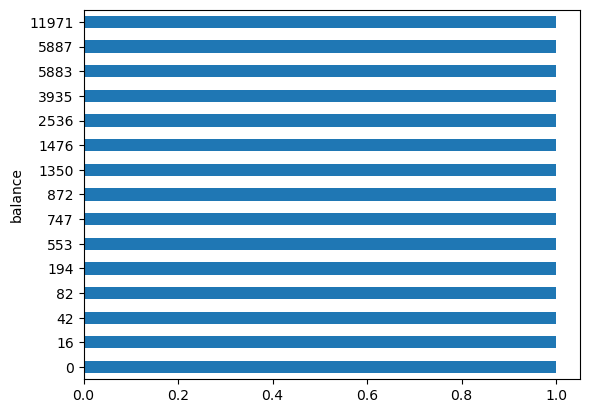

In [17]:
management['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')

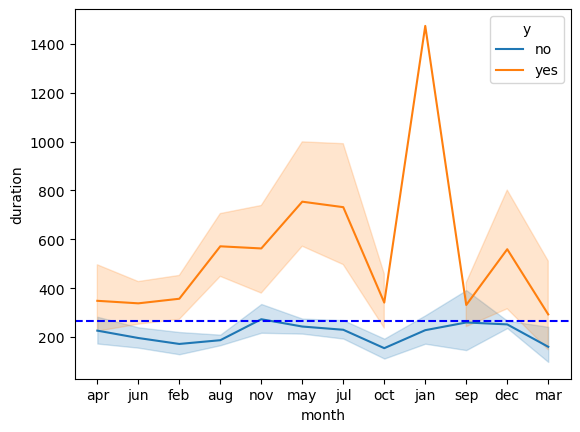

In [18]:
sns.lineplot(x = management['month'], y = management['duration'],hue = management['y'])
plt.axhline(264,linestyle = '--',c = 'b')
plt.show()

<Axes: ylabel='count'>

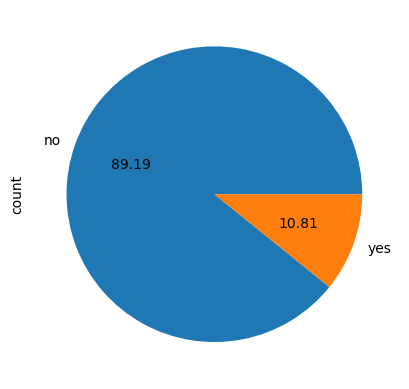

In [27]:
technician=df[df['job']=='technician']
technician['y'].value_counts().plot(kind = 'pie',autopct='%1.2f')

<Axes: ylabel='balance'>

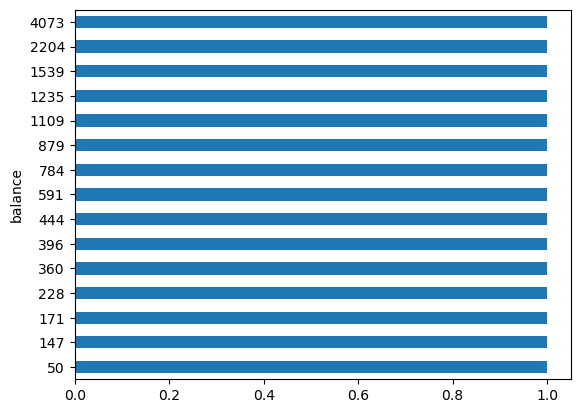

In [29]:
technician['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')

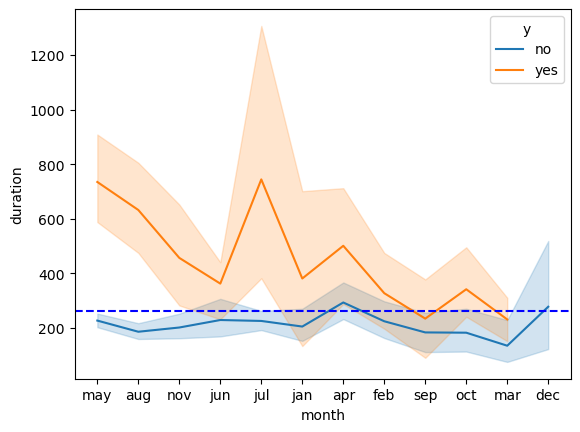

In [31]:
sns.lineplot(x = technician['month'], y = technician['duration'],hue = technician['y'])
plt.axhline(264,linestyle = '--',c = 'b')
plt.show()

<Axes: ylabel='count'>

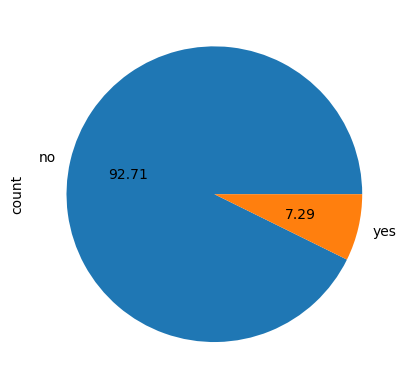

In [47]:
blue_collar=df[df['job']=='blue-collar']
blue_collar['y'].value_counts().plot(kind = 'pie',autopct='%1.2f')

<Axes: ylabel='balance'>

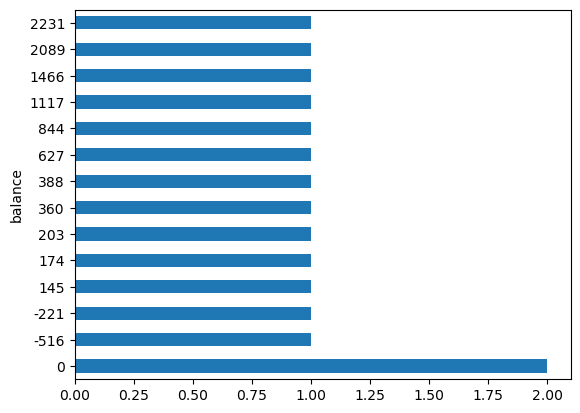

In [55]:
blue_collar['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='barh')

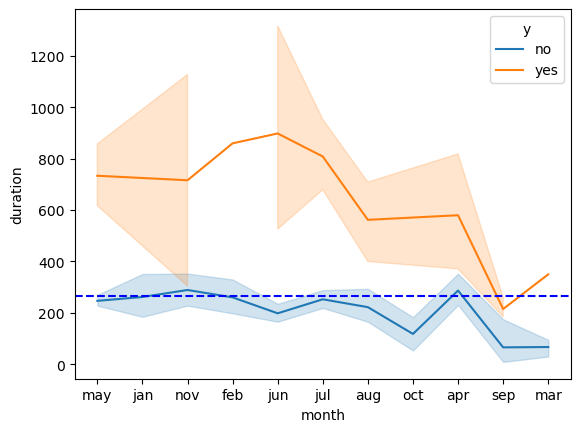

In [57]:
sns.lineplot(x = blue_collar['month'], y = blue_collar['duration'],hue = blue_collar['y'])
plt.axhline(264,linestyle = '--',c = 'b')
plt.show()

<Axes: ylabel='count'>

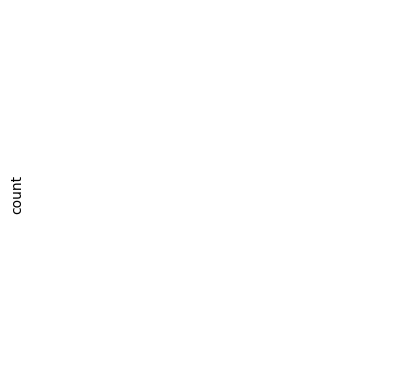

In [63]:
admin = df[df['job']=='admin']
admin['y'].value_counts().plot(kind='pie',autopct = '%1.2f')

In [67]:
admin

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
